In [4]:
# Import Libraries and Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import matplotlib.dates as mdates
from pathlib import Path
print(f"{Path.cwd()}")

C:\Users\norma\Desktop\Jupyter-Workspace\Group_Project_1\tire_recalls


In [7]:
# Create reference to csv file
csv_path = (r"C:\Users\norma\Desktop\Jupyter-Workspace\Group_Project_1\tire_recalls\Resources\vrdb_60days_daily.csv")
csv_df = pd.read_csv(csv_path)
csv_df.head()

,RECALL_NUMBER_NUM,YEAR,MANUFACTURER_RECALL_NO_TXT,CATEGORY_ETXT,CATEGORY_FTXT,MAKE_NAME_NM,MODEL_NAME_NM,UNIT_AFFECTED_NBR,SYSTEM_TYPE_ETXT,SYSTEM_TYPE_FTXT,NOTIFICATION_TYPE_ETXT,NOTIFICATION_TYPE_FTXT,COMMENT_ETXT,COMMENT_FTXT,RECALL_DATE_DTE,LAST_UPDATE_DATE,MANUFACTURER_NAME_NM
0,1995081,1995,NaN,Car,Voiture,JAGUAR,XJ,13.00,Suspension,Suspension,Safety Mfr,Sécurité - fabricant,TORQUE RELAXATION OF TRACK ROD AND RETAINING N...,Le desserrage des barres d'accouplement et de ...,1995-05-16,2022-10-25,JAGUAR
1,2007371,2008,NaN,SUV,Véhicule utilitaire-sport,NISSAN,XTERRA,4.00,Brakes,Freins,Safety Mfr,Sécurité - fabricant,"On certain vehicles, the Anti-lock Brake Syste...","Sur certains véhicules, le dispositif d'action...",2007-11-16,2022-10-25,NISSAN
2,2009206,2009,ATV-09-01,A.T.V.,Véhicule tout terrain,POLARIS,SPORTSMAN XP 850,"1,981.00",Engine,Moteur,Safety Mfr,Sécurité - fabricant,"On certain ATVs, operated in sub-freezing temp...","Sur certains VTT, utilisés lorsque la températ...",2009-07-09,2022-11-09,POLARIS
3,2009315,2009,ATV-09-02,A.T.V.,Véhicule tout terrain,POLARIS,SPORTSMAN XP 550,"2,639.00",Suspension,Suspension,Safety Mfr,Sécurité - fabricant,"On certain ATVs, the front suspension steering...","Sur certains VTT, les fusées d'essieu de suspe...",2009-10-30,2022-11-09,POLARIS
4,2009315,2009,ATV-09-02,A.T.V.,Véhicule tout terrain,POLARIS,SPORTSMAN XP 850,"2,639.00",Suspension,Suspension,Safety Mfr,Sécurité - fabricant,"On certain ATVs, the front suspension steering...","Sur certains VTT, les fusées d'essieu de suspe...",2009-10-30,2022-11-09,POLARIS


In [10]:
# Clean, sort, and convert Data. (Thanks Beni)
# Drop duplicates
csv_df = csv_df.drop_duplicates().copy()
# remove , in the number fields
csv_df["UNIT_AFFECTED_NBR"] = csv_df["UNIT_AFFECTED_NBR"].str.replace(",", "")
# convert the data type of number of unit from string to float
csv_df["UNIT_AFFECTED_NBR"] = csv_df["UNIT_AFFECTED_NBR"].astype('float')
# convert the data type of number of unit from float to integer
csv_df["UNIT_AFFECTED_NBR"] = csv_df["UNIT_AFFECTED_NBR"].astype('int')
#display the sample data
csv_df.tail()

,RECALL_NUMBER_NUM,YEAR,MANUFACTURER_RECALL_NO_TXT,CATEGORY_ETXT,CATEGORY_FTXT,MAKE_NAME_NM,MODEL_NAME_NM,UNIT_AFFECTED_NBR,SYSTEM_TYPE_ETXT,SYSTEM_TYPE_FTXT,NOTIFICATION_TYPE_ETXT,NOTIFICATION_TYPE_FTXT,COMMENT_ETXT,COMMENT_FTXT,RECALL_DATE_DTE,LAST_UPDATE_DATE,MANUFACTURER_NAME_NM
4785,2022662,2022,RC0000287,Motorhome,Autocaravane,THOR MOTOR COACH,CHALLENGER,84,Brakes,Freins,Recalls Audit,Rappels - audit,"Issue: \r\nOn certain motorhomes, the bolts th...","Problème : \r\nSur certaines autocaravanes, le...",2022-11-22,2022-11-22,THOR MOTOR COACH
4786,2022662,2022,RC0000287,Motorhome,Autocaravane,THOR MOTOR COACH,MIRAMAR,84,Brakes,Freins,Recalls Audit,Rappels - audit,"Issue: \r\nOn certain motorhomes, the bolts th...","Problème : \r\nSur certaines autocaravanes, le...",2022-11-22,2022-11-22,THOR MOTOR COACH
4787,2022662,2022,RC0000287,Motorhome,Autocaravane,THOR MOTOR COACH,WINDSPORT,84,Brakes,Freins,Recalls Audit,Rappels - audit,"Issue: \r\nOn certain motorhomes, the bolts th...","Problème : \r\nSur certaines autocaravanes, le...",2022-11-22,2022-11-22,THOR MOTOR COACH
4788,2022662,2022,RC0000287,Motorhome,Autocaravane,THOR MOTOR COACH,HURRICANE,84,Brakes,Freins,Recalls Audit,Rappels - audit,"Issue: \r\nOn certain motorhomes, the bolts th...","Problème : \r\nSur certaines autocaravanes, le...",2022-11-22,2022-11-22,THOR MOTOR COACH
4789,2022662,2022,RC0000287,Motorhome,Autocaravane,THOR MOTOR COACH,ACE,84,Brakes,Freins,Recalls Audit,Rappels - audit,"Issue: \r\nOn certain motorhomes, the bolts th...","Problème : \r\nSur certaines autocaravanes, le...",2022-11-22,2022-11-22,THOR MOTOR COACH


In [11]:
# Drop French transcription & Unneeded columns
drop_df = csv_df.drop(["RECALL_NUMBER_NUM", "MANUFACTURER_RECALL_NO_TXT", "CATEGORY_FTXT", "SYSTEM_TYPE_FTXT", "NOTIFICATION_TYPE_FTXT", "NOTIFICATION_TYPE_ETXT", "COMMENT_FTXT", "COMMENT_ETXT", "LAST_UPDATE_DATE"], axis = 1)
drop_df.head()

,YEAR,CATEGORY_ETXT,MAKE_NAME_NM,MODEL_NAME_NM,UNIT_AFFECTED_NBR,SYSTEM_TYPE_ETXT,RECALL_DATE_DTE,MANUFACTURER_NAME_NM
0,1995,Car,JAGUAR,XJ,13,Suspension,1995-05-16,JAGUAR
1,2008,SUV,NISSAN,XTERRA,4,Brakes,2007-11-16,NISSAN
2,2009,A.T.V.,POLARIS,SPORTSMAN XP 850,1981,Engine,2009-07-09,POLARIS
3,2009,A.T.V.,POLARIS,SPORTSMAN XP 550,2639,Suspension,2009-10-30,POLARIS
4,2009,A.T.V.,POLARIS,SPORTSMAN XP 850,2639,Suspension,2009-10-30,POLARIS


In [12]:
# Filter DataFrame for Tires
tire_df = drop_df[drop_df["SYSTEM_TYPE_ETXT"].str.contains("Tires")]
tire_df.tail()

,YEAR,CATEGORY_ETXT,MAKE_NAME_NM,MODEL_NAME_NM,UNIT_AFFECTED_NBR,SYSTEM_TYPE_ETXT,RECALL_DATE_DTE,MANUFACTURER_NAME_NM
4572,2020,Tire,ALLIANCE,543 HIGH-SPEED RIB 11L-15FI,433,Tires,2022-10-28,YOKOHAMA OFF-HIGHWAY TIRES
4573,2021,Tire,ALLIANCE,319 STUBBLE PROOF HIGHWAY 11L-15FI,433,Tires,2022-10-28,YOKOHAMA OFF-HIGHWAY TIRES
4574,2021,Tire,GALAXY,IMPMASTER 350 11L-15FI,433,Tires,2022-10-28,YOKOHAMA OFF-HIGHWAY TIRES
4674,2022,Tire,BRIDGESTONE,ALENZA SPORT A/S 235/55R20,523,Tires,2022-11-04,BRIDGESTONE-FIRESTONE
4675,2022,Tire,FIRESTONE,DESTINATION LE2 P265/65R17,523,Tires,2022-11-04,BRIDGESTONE-FIRESTONE


In [13]:
# Sort Recall Date from most recent to least recent.
msd_df = tire_df.sort_values(by=['RECALL_DATE_DTE'], ascending = False)

# Rearrange columns into a more cohesive format for the next step.
msd_df = msd_df[["RECALL_DATE_DTE", "YEAR", "MANUFACTURER_NAME_NM", "MAKE_NAME_NM", "MODEL_NAME_NM", "UNIT_AFFECTED_NBR", "CATEGORY_ETXT", "SYSTEM_TYPE_ETXT"]]
msd_df

,RECALL_DATE_DTE,YEAR,MANUFACTURER_NAME_NM,MAKE_NAME_NM,MODEL_NAME_NM,UNIT_AFFECTED_NBR,CATEGORY_ETXT,SYSTEM_TYPE_ETXT
4675,2022-11-04,2022,BRIDGESTONE-FIRESTONE,FIRESTONE,DESTINATION LE2 P265/65R17,523,Tire,Tires
4674,2022-11-04,2022,BRIDGESTONE-FIRESTONE,BRIDGESTONE,ALENZA SPORT A/S 235/55R20,523,Tire,Tires
4574,2022-10-28,2021,YOKOHAMA OFF-HIGHWAY TIRES,GALAXY,IMPMASTER 350 11L-15FI,433,Tire,Tires
4573,2022-10-28,2021,YOKOHAMA OFF-HIGHWAY TIRES,ALLIANCE,319 STUBBLE PROOF HIGHWAY 11L-15FI,433,Tire,Tires
4572,2022-10-28,2020,YOKOHAMA OFF-HIGHWAY TIRES,ALLIANCE,543 HIGH-SPEED RIB 11L-15FI,433,Tire,Tires
4571,2022-10-28,2020,YOKOHAMA OFF-HIGHWAY TIRES,ALLIANCE,543 HIGH-SPEED RIB 9.5L-15FI,433,Tire,Tires
4570,2022-10-28,2019,YOKOHAMA OFF-HIGHWAY TIRES,ALLIANCE,543 HIGH-SPEED RIB 11L-15FI,433,Tire,Tires
4308,2022-10-20,2018,SHANDONG NEW CONTINENT TIRE CO.,ROLLING BIG POWER TIRES,REPULSOR MT LT285/75R16,204,Tire,Tires
4312,2022-10-20,2022,SHANDONG NEW CONTINENT TIRE CO.,ROLLING BIG POWER TIRES,REPULSOR MT LT285/75R16,204,Tire,Tires
4311,2022-10-20,2021,SHANDONG NEW CONTINENT TIRE CO.,ROLLING BIG POWER TIRES,REPULSOR MT LT285/75R16,204,Tire,Tires


In [14]:
# Acquire start and end dates for a timeline
msd_recent = msd_df["RECALL_DATE_DTE"].max()
msd_last = msd_df["RECALL_DATE_DTE"].min()
print(msd_recent)
print(msd_last)

2022-11-04
2021-02-18


<AxesSubplot:title={'center':'Instances of Manufacturer Recalls'}>

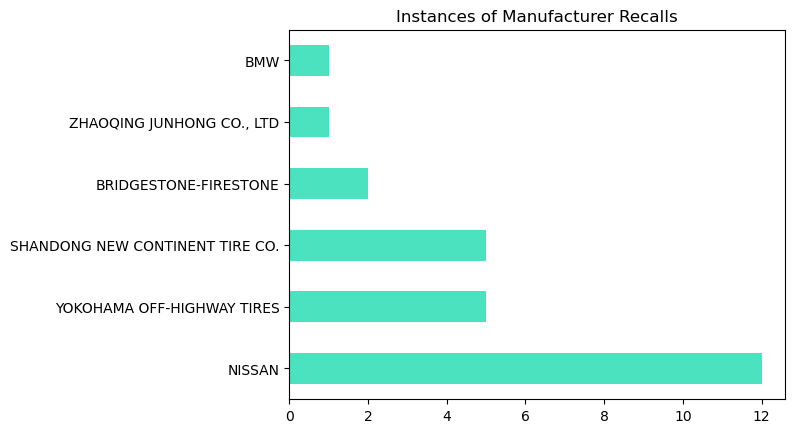

In [36]:
# Count the Events where Manufacturer's had to recall for tire related issues
multi_group = pd.value_counts(msd_df["MANUFACTURER_NAME_NM"])

# Plot as a horizontal bar chart and add colour parameter
multi_group.plot.barh(title = "Instances of Manufacturer Recalls", color = "#4be3bf")

In [16]:
# Create DataFrame based only on the Recall Date and the Make Name
recall_make = msd_df[["RECALL_DATE_DTE", "MAKE_NAME_NM"]]
recall_make = recall_make.drop_duplicates().copy()
recall_make

,RECALL_DATE_DTE,MAKE_NAME_NM
4675,2022-11-04,FIRESTONE
4674,2022-11-04,BRIDGESTONE
4574,2022-10-28,GALAXY
4573,2022-10-28,ALLIANCE
4308,2022-10-20,ROLLING BIG POWER TIRES
3730,2022-09-20,ANTARES
552,2021-03-12,NISSAN
499,2021-02-18,BMW


In [17]:
# Convert Recall Date column into a List
recall_date_list = recall_make["RECALL_DATE_DTE"].tolist()
make_list = recall_make["MAKE_NAME_NM"].tolist()

In [18]:
# Convert date strings (ex. YYYY-MM-DD) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in recall_date_list]
names = make_list

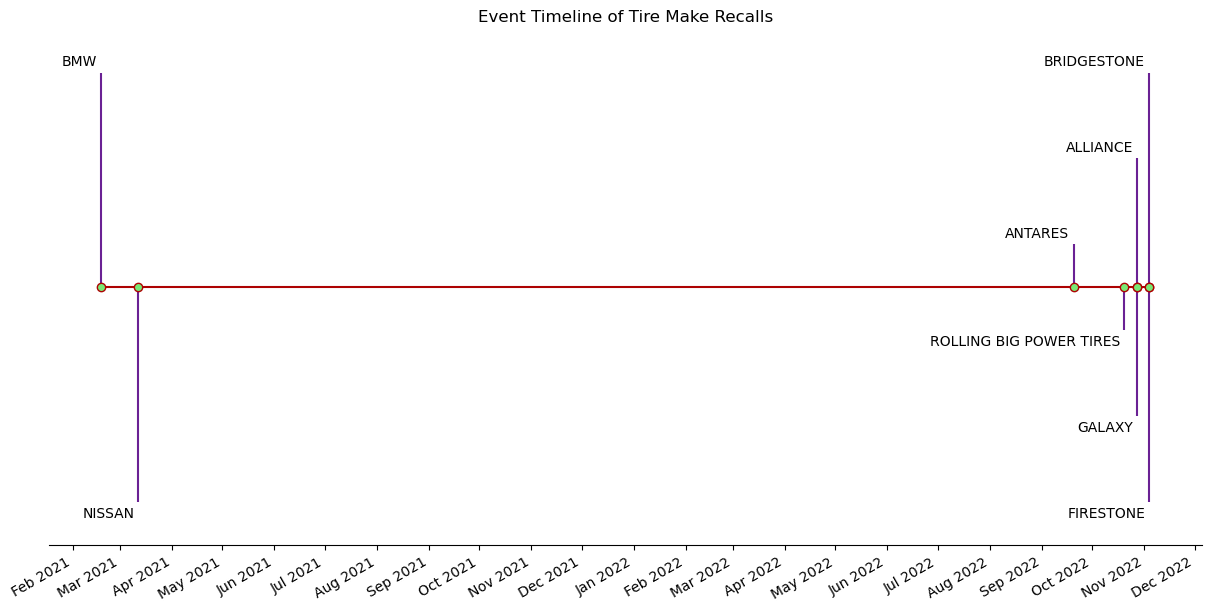

In [48]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)
ax.set(title="Event Timeline of Tire Make Recalls")

ax.vlines(dates, 0, levels, color="#6a2194")  # The vertical stems. 
ax.plot(dates, np.zeros_like(dates), "-o",
        color="#ad0202", markerfacecolor="#78e874")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 1 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()